<a href="https://colab.research.google.com/github/ujanichakma/AI_LAB_4-1_2025/blob/main/AI_final_assignment/AI_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Baseline Model...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 50ms/step - accuracy: 0.8900 - loss: 0.3640 - val_accuracy: 0.9859 - val_loss: 0.0420
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 48ms/step - accuracy: 0.9860 - loss: 0.0460 - val_accuracy: 0.9856 - val_loss: 0.0458
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9903 - loss: 0.0310 - val_accuracy: 0.9883 - val_loss: 0.0337
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9931 - loss: 0.0214 - val_accuracy: 0.9899 - val_loss: 0.0313
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.9943 - loss: 0.0173 - val_accuracy: 0.9904 - val_loss: 0.0278
Training Dropout Model...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 49ms/step - accuracy: 0.8638 - loss: 0.4373 - val_accuracy: 0.9848 - val_loss: 0.0485
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9790 - loss: 0.0694 - val_accuracy: 0.9892 - val_loss: 

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 67ms/step - accuracy: 0.7675 - loss: 0.7134 - val_accuracy: 0.9806 - val_loss: 0.0562
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.9464 - loss: 0.1708 - val_accuracy: 0.9860 - val_loss: 0.0428
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 0.9631 - loss: 0.1207 - val_accuracy: 0.9885 - val_loss: 0.0343
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.9705 - loss: 0.0941 - val_accuracy: 0.9900 - val_loss: 0.0304
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.9754 - loss: 0.0804 - val_accuracy: 0.9923 - val_loss: 0.0229


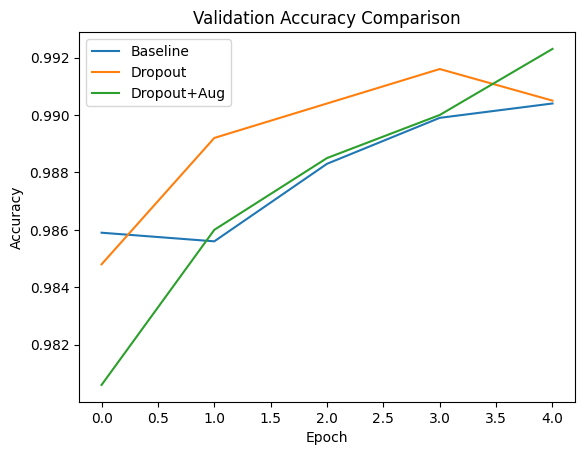

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 2. Model Builder Function
def build_model(use_dropout=False):
    model = models.Sequential()
    model.add(layers.Input(shape=(28,28,1)))
    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))

    if use_dropout:
        model.add(layers.Dropout(0.3))   # Dropout Layer

    model.add(layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# 3. Baseline Model (No Dropout, No Augmentation)
print("Training Baseline Model...")
baseline_model = build_model(use_dropout=False)
hist_baseline = baseline_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# 4. Model with Dropout Only
print("Training Dropout Model...")
dropout_model = build_model(use_dropout=True)
hist_dropout = dropout_model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# 5. Data Augmentation Generator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

# 6. Model with Dropout + Augmentation
print("Training Augmentation + Dropout Model...")
aug_model = build_model(use_dropout=True)
hist_aug = aug_model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=5,
    validation_data=(x_test, y_test)
)

# 7. Plot Comparison
def plot_history(h1, h2, h3):
    plt.plot(h1.history['val_accuracy'], label='Baseline')
    plt.plot(h2.history['val_accuracy'], label='Dropout')
    plt.plot(h3.history['val_accuracy'], label='Dropout+Aug')
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(hist_baseline, hist_dropout, hist_aug)
